
Samir Khan

CS 4412 - set_data Mining

Assignment 2

In [0]:
import pandas as pand
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plot

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
full_set = pand.read_csv('/content/drive/My Drive/Live.csv')
set_data =full_set[['status_type', 'num_reactions', 'num_comments', 'num_shares', 
                'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].copy()
set_data["status_type"] = LabelEncoder().fit_transform(set_data['status_type'])
set_data

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


### KMeans

In [0]:
for n_clus in [4,6,10,12,20]:
    kmeans = KMeans(n_clusters=n_clus, random_state=42).fit(set_data)
    n_diff = pand.np.unique(kmeans.labels_,return_counts=True)
kmeans = KMeans(n_clusters=10, random_state=42).fit(set_data)
n_diff = pand.np.unique(kmeans.labels_,return_counts=True)

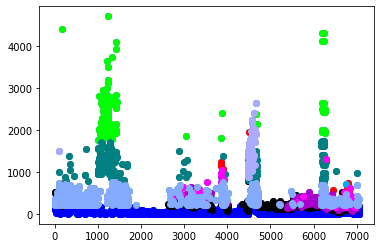

In [102]:
colors = ['#0000FF','#FF0000','#00FF00','#000000','#00AAFF','#AB00CD','#008080','#FF00FF','#AAAAFF','#84ABFD']
plot.scatter(set_data.index,set_data['num_reactions'])
for i in range(kmeans.n_clusters):
    x_plot = set_data.iloc[kmeans.labels_==i]['num_reactions']
    plot.scatter(x_plot.index,x_plot,c=colors[i])

### Hiearchal Agglomerative Clustering (HAC)

In [0]:
for n_clus in [4,10,15]:
    for linkage in ['ward', 'complete', 'average', 'single']:
        clustering = AgglomerativeClustering(n_clusters=n_clus,linkage=linkage).fit(set_data)
        n_diff = pand.np.unique(clustering.labels_,return_counts=True)
clustering = AgglomerativeClustering(n_clusters=10,linkage='ward').fit(set_data)
n_diff = pand.np.unique(clustering.labels_,return_counts=True)

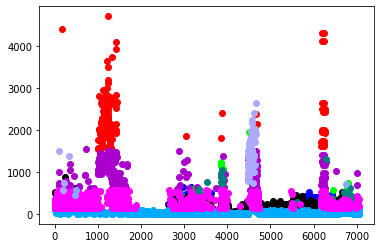

In [101]:
colors = ['#0000FF','#FF0000','#00FF00','#000000','#00AAFF','#AB00CD','#008080','#FF00FF','#AAAAFF','#84ABFD']
for i in range(clustering.n_clusters):
    x_plot = set_data.iloc[clustering.labels_==i]['num_reactions']
    plot.scatter(x_plot.index,x_plot,c=colors[i])